In [1]:
#fetching the training data
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'))
import string
from nltk.tokenize import word_tokenize

In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Preparing data

In [3]:
#y contains the name of the target values
y=newsgroups_train.target

Building the training dataframe

In [4]:
#vocab is the dictionary to store the words and the frequency
vocab={}

In [5]:
#to remove stop words i have imported some of it from the nltk
import spacy
nlp = spacy.load("en_core_web_sm")

# Get the stopwords from the language model
stop_words = nlp.Defaults.stop_words

In [6]:
#i realised there are a lot more stop words and punctiations needed
more_stop_words=['========================================================================',"there,","up.",";",'"i','(as','\t','said','it.',"didn't","doesn't",'sure','(and',"*/\nx","(or","8","9","10","isn't","7","i'd","\n\n","\ni","you're","it,","that's","5","the\n","x","&","i've","=","can't","\nthe","\n\t",">","|",".","we're","|>","","16","\nof","they're","-"," ","\n","don't","use","1","it's","--","i'm",":","*","0","3","4","2","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now","I"]
punctuations=list(string.punctuation)
more_stop_words=more_stop_words+punctuations

In [7]:
stop_words.update(more_stop_words)

In [8]:
stop_words

{'',
 '\t',
 '\n',
 '\n\t',
 '\n\n',
 '\ni',
 '\nof',
 '\nthe',
 ' ',
 '!',
 '"',
 '"i',
 '#',
 '$',
 '%',
 '&',
 "'",
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 '(',
 '(and',
 '(as',
 '(or',
 ')',
 '*',
 '*/\nx',
 '+',
 ',',
 '-',
 '--',
 '.',
 '/',
 '0',
 '1',
 '10',
 '16',
 '2',
 '3',
 '4',
 '5',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '========================================================================',
 '>',
 '?',
 '@',
 'I',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'bey

In [9]:
#tokenize the document to make a dictionary
all_documents_modified=[word_tokenize(doc) for doc in newsgroups_train.data]

In [10]:
#building the dictionary with words and their frequency
for i in all_documents_modified:
    for word in i:
        word=word.lower()
        if(word not in stop_words and len(word)!=1 and len(word)!=2 and word[0]!="'" and word!="n't" and word[0]!="." and word!="*'"):
            if word not in vocab:
                vocab[word]=1
            else:
                vocab[word]=vocab[word]+1

In [11]:
vocab

{'wondering': 185,
 'enlighten': 13,
 'car': 771,
 'saw': 418,
 'day': 842,
 '2-door': 3,
 'sports': 91,
 'looked': 259,
 'late': 207,
 '60s/': 1,
 'early': 336,
 '70s': 10,
 'called': 802,
 'bricklin': 2,
 'doors': 60,
 'small': 587,
 'addition': 231,
 'bumper': 21,
 'separate': 159,
 'rest': 361,
 'body': 372,
 'know': 3479,
 'tellme': 1,
 'model': 345,
 'engine': 262,
 'specs': 77,
 'years': 1375,
 'production': 87,
 'history': 458,
 'info': 582,
 'funky': 5,
 'looking': 679,
 'e-mail': 495,
 'fair': 153,
 'number': 1291,
 'brave': 18,
 'souls': 31,
 'upgraded': 37,
 'clock': 144,
 'oscillator': 24,
 'shared': 108,
 'experiences': 77,
 'poll': 24,
 'send': 839,
 'brief': 53,
 'message': 538,
 'detailing': 11,
 'procedure': 79,
 'speed': 501,
 'attained': 7,
 'cpu': 159,
 'rated': 36,
 'add': 344,
 'cards': 293,
 'adapters': 24,
 'heat': 116,
 'sinks': 8,
 'hour': 86,
 'usage': 103,
 'floppy': 226,
 'disk': 649,
 'functionality': 55,
 '800': 93,
 '1.4': 17,
 'floppies': 40,
 'especia

In [12]:
#separarting words and their frequency to make a graph
freq=np.array([i for i in vocab.values()])
words=np.array([i for i in vocab.keys()])

In [13]:
words=words[np.argsort(freq)][::-1]
freq=np.sort(freq)[::-1]
#now i have sorted both the arrays and first arranged them in ascending order using np.sort() and np.argsort() and then i have
# reversed the so obtained array to get a descending ordered array.

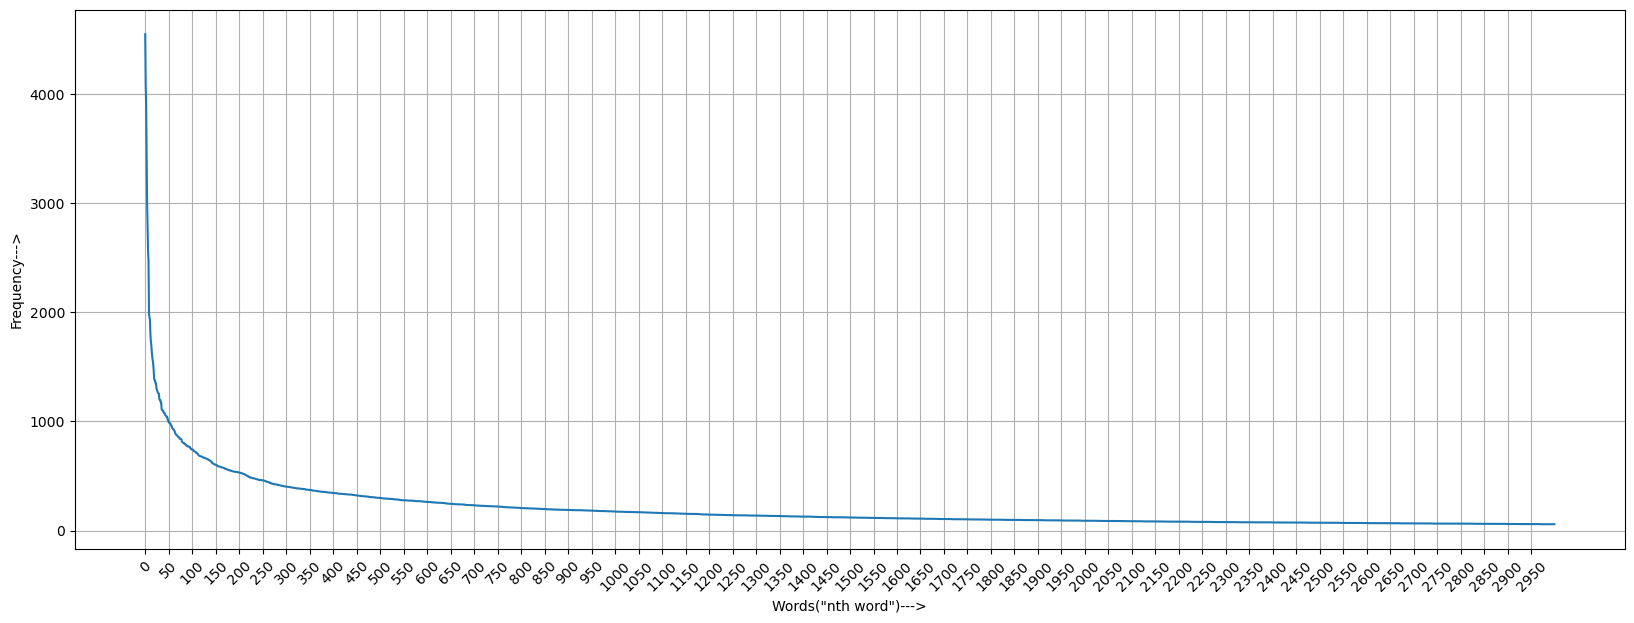

In [14]:
#This cell draws a frequency distribution graph for us to from where we can carefully observe the frequency trend of out list.
import matplotlib.pyplot as plt
#following are the limits for our graph.
lower_limit=0    #default
upper_limit=3000    #default
difference_between_each_xtick=50  #default value. change these values to observe the graph in more depth
#adjusting size of the graph for more clearity.
plt.figure(figsize=(20, 7))
#plotting
plt.plot(np.arange(len(freq))[lower_limit:upper_limit], freq[lower_limit:upper_limit])
#labelling
plt.xlabel('Words("nth word")--->')
plt.ylabel("Frequency--->")
#adjusting the xticks
plt.xticks(np.arange(lower_limit, upper_limit, 50), rotation=45)
plt.grid()
plt.show()
#observe the following graph by changing the values of lower_limit, upper_limit and difference_between_each_xtick.

In [15]:
#i have taken a lot of words as features but a lot less is required and more stop words can be removed 
cols=words[20:110000]

In [16]:
#fething the words from documents and increasing their count in the dataframe for the training
def create_dataframe(newsgroups,cols):
    dataframe = pd.DataFrame(0, index=range(len(newsgroups.data)), columns=cols)
    print(dataframe.shape)
    for i in range(0,len(newsgroups.data)):
        d1=newsgroups.data[i]
        words=d1.split(' ')
        for word in words:
            word=word.lower()
            if(len(word)>2):
                if (word[0]=='.' or word[0]==','):
                    word=word[1:len(word)]
                if (word[len(word)-1]==',' or word[len(word)-1]=='.'):
                    word=word[0:len(word)-1]
                if (word in cols):
                    col_index=np.where(cols==word)[0][0]
                    dataframe.iloc[i,col_index]+=1
    return dataframe

In [17]:
train_dataframe=create_dataframe(newsgroups_train,cols)

(11314, 109980)


In [18]:
train_dataframe

,years,program,find,believe,available,number,point,year,thanks,things,...,+2tm\e5,_/s\_jznk/s\,:.s,xgizij,eu=8,jjjjjjjj,7t/q,rjy4ajvhsk,mwa=146,/5p4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Building the testing dataframe

In [19]:
#doing the same for the testing dataset
data_test=fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'))

In [20]:
test_dataframe=create_dataframe(data_test,cols)

(7532, 109980)


In [21]:
test_dataframe

,years,program,find,believe,available,number,point,year,thanks,things,...,+2tm\e5,_/s\_jznk/s\,:.s,xgizij,eu=8,jjjjjjjj,7t/q,rjy4ajvhsk,mwa=146,/5p4
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7527,0,0,0,0,0,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
7528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7529,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Building the model

In [36]:
#fit function to create a dictionary for the different classes and words and their freq in each document
def fit(X_train,Y_train):
    result={}
    result['total_words_in_data']=0
    unique_class=set(Y_train)
    for current_class in unique_class:
        print(current_class)
        result[current_class]={}
        current_class_rows=(Y_train==current_class)
        X_train_current=X_train[current_class_rows]
        Y_train_current=Y_train[current_class_rows]
        result[current_class]["total_count_current_class"]=0
        num_features=X_train.shape[1]
        for j in range(1,num_features+1):
            result[current_class][j]={}
            result[current_class][j]=X_train_current.iloc[:,j-1].sum()
            result[current_class]["total_count_current_class"]+=X_train_current.iloc[:,j-1].sum()
            result['total_words_in_data']+=X_train_current.iloc[:,j-1].sum()
            
    
    return result

In [37]:
dictionary=fit(train_dataframe.iloc[:,0:10500],newsgroups_train.target)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [38]:
dictionary[0]

{'total_count_current_class': 23147,
 1: 38,
 2: 3,
 3: 59,
 4: 140,
 5: 3,
 6: 25,
 7: 66,
 8: 8,
 9: 6,
 10: 80,
 11: 19,
 12: 2,
 13: 26,
 14: 47,
 15: 16,
 16: 0,
 17: 3,
 18: 6,
 19: 67,
 20: 62,
 21: 37,
 22: 21,
 23: 0,
 24: 21,
 25: 51,
 26: 22,
 27: 4,
 28: 49,
 29: 55,
 30: 36,
 31: 29,
 32: 53,
 33: 48,
 34: 67,
 35: 43,
 36: 48,
 37: 47,
 38: 96,
 39: 77,
 40: 1,
 41: 29,
 42: 23,
 43: 0,
 44: 15,
 45: 40,
 46: 53,
 47: 103,
 48: 18,
 49: 42,
 50: 39,
 51: 20,
 52: 25,
 53: 7,
 54: 32,
 55: 37,
 56: 30,
 57: 21,
 58: 45,
 59: 8,
 60: 70,
 61: 37,
 62: 15,
 63: 24,
 64: 4,
 65: 24,
 66: 22,
 67: 29,
 68: 2,
 69: 8,
 70: 27,
 71: 10,
 72: 28,
 73: 2,
 74: 72,
 75: 0,
 76: 22,
 77: 2,
 78: 15,
 79: 16,
 80: 67,
 81: 19,
 82: 4,
 83: 24,
 84: 0,
 85: 17,
 86: 15,
 87: 31,
 88: 16,
 89: 56,
 90: 16,
 91: 40,
 92: 18,
 93: 10,
 94: 13,
 95: 43,
 96: 0,
 97: 1,
 98: 8,
 99: 38,
 100: 6,
 101: 45,
 102: 31,
 103: 34,
 104: 47,
 105: 32,
 106: 43,
 107: 17,
 108: 39,
 109: 5,
 110: 

In [39]:
#predict function which will take testing document and return array of predictions
def predict(dictionary, X_test):
  
    y_pred = []
    for i in range(len(X_test)):
        x_class = predictSinglePoint(dictionary, X_test.iloc[i])
        y_pred.append(x_class)
    return y_pred

In [40]:
def predictSinglePoint(dictionary, x):
    classes = dictionary.keys()
    best_p = -1000
    best_class = -1
    first_run = True
    for current_class in classes:
        if current_class!='total_words_in_data':
            p_current_class = probability(dictionary, x, current_class)
            if (first_run or p_current_class > best_p):
                best_p = p_current_class
                best_class = current_class
            first_run = False
    return best_class

In [41]:
#this is the most important function which calculates the probability for each testing data for fifferent classes
def probability(dictionary, x, current_class):
    output = np.log(dictionary[current_class]["total_count_current_class"]) - np.log(dictionary['total_words_in_data'])
    num_features = len(dictionary[current_class].keys()) - 1;
    for j in range(1, num_features + 1):
        if x[j-1]!=0:
            count_current_class_with_value_xj = dictionary[current_class][j]+1 #laplace correction
            count_current_class = dictionary[current_class]["total_count_current_class"]+len(dictionary[current_class].keys())
            current_xj_probablity = np.log(count_current_class_with_value_xj) - np.log(count_current_class)
            output = output + current_xj_probablity
    return output

In [42]:
y_pred=predict(dictionary,test_dataframe.iloc[:,0:10500])

In [47]:
data_test.target

array([ 7,  5,  0, ...,  9,  6, 15])

In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(data_test.target,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.46      0.46       319
           1       0.55      0.61      0.58       389
           2       0.64      0.46      0.53       394
           3       0.59      0.59      0.59       392
           4       0.62      0.58      0.60       385
           5       0.67      0.68      0.67       395
           6       0.78      0.66      0.71       390
           7       0.70      0.63      0.67       396
           8       0.78      0.60      0.67       398
           9       0.87      0.71      0.78       397
          10       0.89      0.83      0.86       399
          11       0.65      0.68      0.67       396
          12       0.62      0.48      0.54       393
          13       0.77      0.69      0.72       396
          14       0.70      0.68      0.69       394
          15       0.49      0.77      0.60       398
          16       0.50      0.60      0.55       364
          17       0.36    

In [34]:
#Now trying out the inbuilt Multinomial naive bayes classifier.
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(train_dataframe.iloc[:,0:10700],newsgroups_train.target)
clf.score(test_dataframe.iloc[:,0:10700],data_test.target)

0.6145778013807753

In [53]:
y_pred_multi=clf.predict(test_dataframe.iloc[:,0:10700])

In [54]:
print(classification_report(data_test.target,y_pred_multi))

              precision    recall  f1-score   support

           0       0.45      0.46      0.45       319
           1       0.57      0.62      0.60       389
           2       0.58      0.52      0.54       394
           3       0.57      0.57      0.57       392
           4       0.60      0.60      0.60       385
           5       0.72      0.66      0.69       395
           6       0.73      0.67      0.70       390
           7       0.66      0.66      0.66       396
           8       0.71      0.61      0.66       398
           9       0.82      0.74      0.78       397
          10       0.51      0.87      0.64       399
          11       0.70      0.65      0.68       396
          12       0.61      0.48      0.54       393
          13       0.77      0.68      0.72       396
          14       0.74      0.66      0.70       394
          15       0.52      0.76      0.62       398
          16       0.52      0.61      0.56       364
          17       0.71    

In [50]:
#we are getting almost same accuracy using inbulit classification algorithm and which is implemented by own..this accuracy can be imporoved by using nlp libraries